<a href="https://colab.research.google.com/github/RutujaJadhav/Baby-got-Back/blob/master/BabyGotBack_Projectdetails_ideation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4: Final Report Part 1
This homework is very different from previous homeworks. The most signficant change is that this is a __group assignment__ that focuses on your project. You should complete it in collaboration with members of your project group. There is no coding, so you should feel free to complete the assignment in word or whatever format you are most comfortable with. This will be worth a significant amount of your final grade, so please try to do a good job. 

As usual, the homework is broken into tasks, however, each task is a phase of planning. For each task, you're highly encouraged to include graphics that aid in your explanations and thought processes. If you need help making these graphics, I recommend taking a look at [yed](https://www.yworks.com/products/yed), a really neat graph editor.

Only one member of the group should submit this assignment, however, please provide the names of each member of the group here:

**Group Members:**
*   Rutuja Jadhav
*   Gero Bergk
*   Tianke Li
*   Angela Sun



## Task 1: Problem Description
For this task you'll be describing what you want to accomplish. Of course some of this can be copy pasted from previous presentations you've done, but there are additional considerations you'll have to make. Specifically you should:
* Describe the goal of your project
* What requirements does the project have? For example, what accuracy do you need to create a compelling experience? How fast does it need to run? Are there any privacy concerns? Etc...
* What class of machine learning problem is this? Is there overlap between several classes? In this context, a class of problem would be simple classification, natural language processing, vision, or one of the other topics discussed.

For our project, we aim to design a smart baby monitoring system that assesses the safety of an infant's sleeping environment with night vision capabilities. Our solution primarily focuses on being able to identify risk factors associated with SIDS(Sudden infant Death Syndrome) in an infant's sleeping environment, and alert parents of these risk factors. SIDS is the unexplained death, usually during sleep, of a seemingly healthy baby less than a year old.  These risk factors that we focus on include the objects most commonly found in a crib : pillows, blankets, bottles, and stuffed animals. As part of this goal, our solution alerts the parents of the degree of risk posed to the baby, based on the distance of these risk factors from the baby's face. This aforementioned feature is enabled by our machine learning model, but we also built other auxillary features such as humidity, temperature threshold sensing and alerting, etc. that are not powered by machine learning.

Due to the criticality of the application, we aim to create as high of an accuracy as possible. With the given time frame and data constraints, we set a goal to achieve over 90% accuracy for our demo. In a real-life scenario, we would ere on the side of having to deal with false positives. We also need to foster a close to realtime streaming experience, and therefore target close to realtime for our final demo based on our time and resources. 

In a real life scenario, we would target >15 fps of speed. While not include in our target scope for this project, we believe that it would be important to deploy a real-world solution that anonyminizes video streaming data when processing in the cloud to protect the baby's privacy.

Our machine learning problem is classified as a computer vision (specifically object detection and localization) problem.

## Task 2: Dataset Description
In this task, you'll consider the dataset being collected to achieve your goal.
* Which features do you need to collect? How do each of these features relate to the output of your network?
* Describe your data collection procedure. How will you store the data? How will you prevent accidentally teaching the network something you didn't mean to. For example, If I trained a network with images all from the same room, it might learn to look for that background and not work anywhere else.
* How many samples do you think you'll need? This relates both to the difficulty of the problem and the complexity of the network. How long do you expect it'll take to collect those samples? How much memory do you expect your dataset to take?
* What are the labels for your data? How are they being labeled? Do you think there's any bias that might be accidentally inserted?

To achieve our objective, we need to collect images from different angles under different lighting conditions and extract the features using **Convolutional Neural Network** which typically extracts features as geometric shapes, edges in the intial layes and more prominent features as patterns of the object (eg:eyes, hair in case detecting the baby) in the deeper layers. 

We aim to create two different datasets and models for daylight and infrared images. Our target data collection procedure process involves a combination of original data collection (taking photos of our 'mock' environment) and using a web scraper tool to collect images from the internet. We plan to collect and label our data using the tool LabelBox which is collaborative training data platform for AI applications. It enables us to store and label our data with Google Cloud Storage service. To avoid the overfitting of the network, we plan to apply data augmentation to make our dataset better and apply regularization technique to our model while training.

We target a minimum of 200 samples per label at the outset of our project which is a decent number to build a custom object detector.  We anticipated that it would take a few days to a week to collect those samples by hand individually, but soon found a much faster scraper tool for collecting those samples. Our IR images, however, we knew we would have to likely take by hand and/or devise a mechanism for converting daylight to greyscale 'mock' night-time images. We ended up taking ~320 photos by hand over the span of a weekend. We expect our dataset to be taking 2-3 GB of memory. 

Finally, the labels for our data included: pillows, stuffed animals, bottle, baby (face) and blankets. We used a collaborative labeling tool called LabelBox to label our images. For the most part from a labeling perspective, it's unlikely there would be too much room for bias as these items are relatively universally defined. That said, our dataset itself could include bias (e.g., if one ethnicity of baby is over or under-represented). 


---



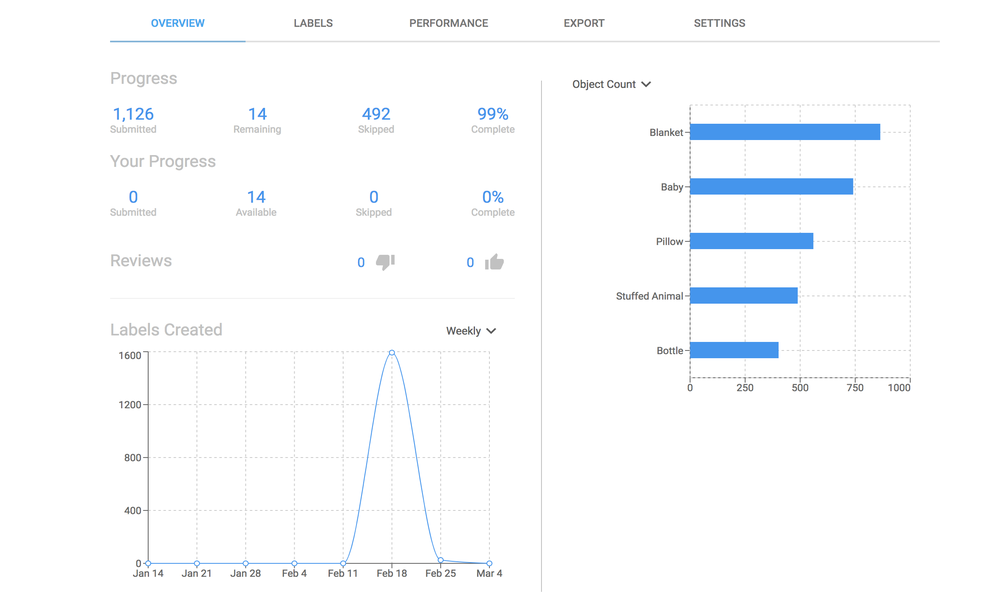

In [0]:
from PIL import Image
im=Image.open(open("daylight.png", 'rb'))
im.resize((1000,600),Image.ANTIALIAS)

## Task 3: Model Design
Now that we have our goal and dataset set up, let's think about how to build a model that achieves our goal. For this task, you absolutely should include a graphic that shows the structure of your proposed architecture.
* What type of architecture will you use? What are the pros and cons of your choice? Are there any alternative architectures that might work too?
* Show the structure of your proposed architecture (graphic here)
* Is there anything special about your architecture, such as a structural difference not covered in class?

We are planning to use **Faster-RCNN Inception V2** (Region-Convolutional Neural Network) for training our custom object detector. The reason for choosing faster-RCNN is it's performance in tensorflow's Object Detection API with accuracy as our priority.

**Pros:**
- Faster RCNN gives a better accuracy in comparision to SSD(Single Shot Detector) or YOLO(You Only Look Once)
- performs comparitively faster than RCNN or fast-RCNN.

**Cons:**

- Not suitable for realtime applications
- Less speed of execution in comparision with SSD or YOLO for object detection

Alternative architectures comprise of RCNN, fast-RCNN, R-FCN(Region-based Fully Convolutional Network),SSD, YOLO with varying speed and accuracy results.

**Structure of our proposed architecture**
The input image from the video feed will be classified as daylight/infrared based on the luminosity of the image and receive the detected objects from our trained daylight/infrared model. 







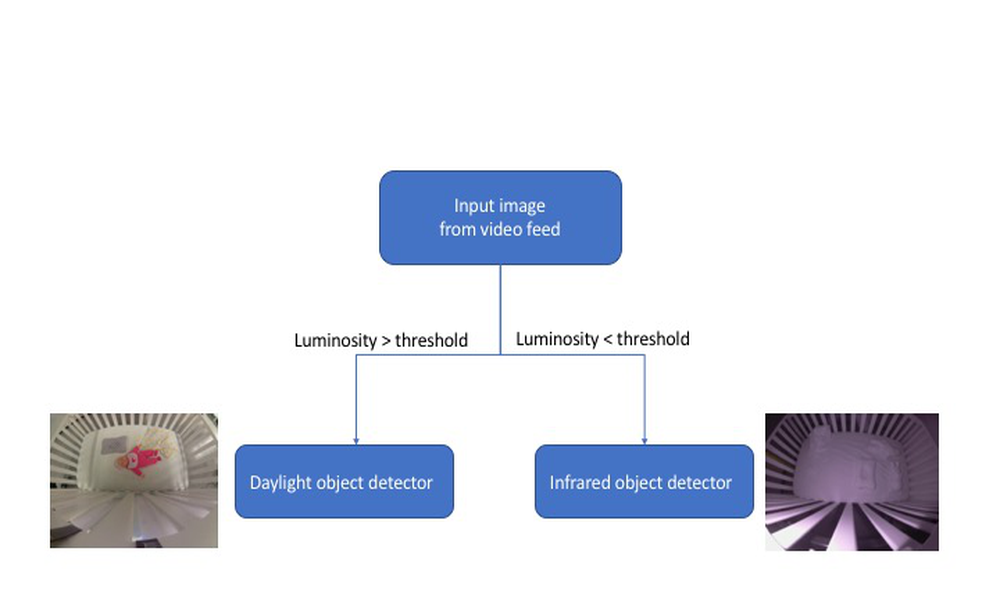

In [0]:
from PIL import Image
im=Image.open(open("Slide2.jpeg", 'rb'))
im.resize((1000,600),Image.ANTIALIAS)

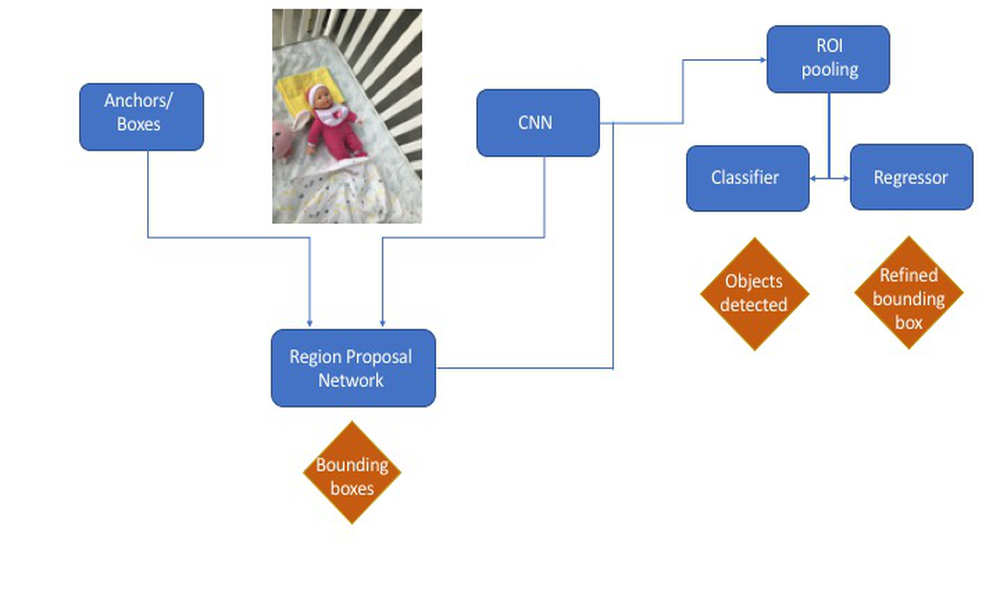

In [0]:
from PIL import Image
im=Image.open(open("Presentation1.jpg", 'rb'))
im.resize((1000,600),Image.ANTIALIAS)




Training custom object detector with faster-RCNN is a laborous, slow process. The steps involved prior to the training include collecting the images, generating XML formats, generating TFRecord structuring as per PASCAL VOC data format. The training takes a couple of hours with approx 20000  training steps for decent performance. 

## Task 4: Training
Let's now consider how you'll be training the model described. Here, consider how difficult the model might be train and what special considerations you may need to take for your project.
* What hyperparameters make sense for your project? Hyperparameters include:
    * Optimization algorithm (sgd, adam, rmsprop, etc)
    * Learning rate
    * Training time (epochs)
    * Regularization (weight decay)
* Are there any special training considerations you need to make? For example, reinforcement learning has a very different flow from normal training. What are those adjustments?
* How will you evaluate the progress of your training. Do you think your validation accuracy will reflect real life?


**Optimization algorithm:** SGD Stochastic gradient descent is an iterative method for optimizing a differentiable objective function through a stochastic approximation of gradient descent optimization. 
**Learning rate:** We plan to drop the learning rate with increasing epochs
with initial learning rate set to 0.0002 which drops to 0.00002 after 9000 epochs and finally to 0.000002 after 12000 epochs

 **Training time (epochs)** 20,000 (which is a ideal for achieving a decent accuracy for our object detector)
 
**Regularization (weight decay)** l2_regularization

**Special consideration:** we plan to include augmentation layer for adding variation in the dataset and also save our model's checkpoints after a regular interval. 
  
**Eavaluating the progress:**The loss function, accuracy and mean average precision set for our epochs are useful to evaluate the progress of our training. 

## Task 5: Deployment
Finally, you have a trained model that accomplishes your initial goals. Now, consider how you'll take this model and make something useful from it.
* Where will the model be run? Does it make sense to have it running on an Azure server? Why or why not? Does it make sense to have it running locally (on raspberry pi for example)? Why or why not?
* How many users do you think could use your product at the same time? Will it effect performance?
* How will you test how well your final product works?

The model will be running and processing the input on Azure server since we can achieve results with improved speed.

We plan to make use of Raspberry Pi as our input edge device which has low processing capabilities and hence not suitable to run the model locally.

Since we plan to make use of service deployed on cloud, we expect at least a 100 users to use our product at the same time without significantly affecting the performance. 

We can test how well our product works by testing in a real environment and getting user feedback from the parents who will be willing to use our product.  
